In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import PIL
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Create DataFrame for Input and output

In [2]:
root_path = "/kaggle/input/dog-and-cat-classification-dataset/PetImages/"
input_path = []
label = []

for class_name in os.listdir(root_path):
    for path in os.listdir(root_path + class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(root_path, class_name, path))

In [3]:
print(input_path[0], label[0])

/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/7981.jpg 1


#### length of input_path and label 

In [4]:
len(input_path), len(label)

(24998, 24998)

In [5]:
df = pd.DataFrame({"Images_path": input_path,"Label": label})
df['Label'] = df['Label'].astype('str')
df.head()

,Images_path,Label
0,/kaggle/input/dog-and-cat-classification-datas...,1
1,/kaggle/input/dog-and-cat-classification-datas...,1
2,/kaggle/input/dog-and-cat-classification-datas...,1
3,/kaggle/input/dog-and-cat-classification-datas...,1
4,/kaggle/input/dog-and-cat-classification-datas...,1


#### Check only `.jpg` file there into the dataset

In [6]:
for i in df['Images_path']:
    if '.jpg' not in i:
        print(i)

In [7]:
l = []
for image in df['Images_path']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)

In [8]:
l[:5]

[]

In [9]:
# to display grid of images
import random

plt.figure(figsize=(10,10))
temp = df[df['Label']==1]['Images_path']
start = random.randint(0, len(temp))
print(start)
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(2,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

0


<Figure size 1000x1000 with 0 Axes>

In [10]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['Label']==0]['Images_path']
start = random.randint(0, len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(2,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

# Spliting the dataset into training and testing

In [11]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

# Create DataGenerator for the images

In [12]:
# training data
train_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation generator
val_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [13]:
# train and validation iterator
train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='Images_path', 
    y_col='Label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='Images_path', 
    y_col='Label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Modeling - CNN

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [17]:
history = model.fit(
    train_iterator,
    epochs=10,
    validation_data=val_iterator
)

Epoch 1/10
40/40 [==============================] - 161s 4s/step - loss: 0.6890 - accuracy: 0.5558 - val_loss: 0.6819 - val_accuracy: 0.5808
Epoch 2/10
40/40 [==============================] - 149s 4s/step - loss: 0.6375 - accuracy: 0.6348 - val_loss: 0.6229 - val_accuracy: 0.6424
Epoch 3/10
40/40 [==============================] - 147s 4s/step - loss: 0.5845 - accuracy: 0.6873 - val_loss: 0.5483 - val_accuracy: 0.7218
Epoch 4/10
40/40 [==============================] - 155s 4s/step - loss: 0.5645 - accuracy: 0.7051 - val_loss: 0.5303 - val_accuracy: 0.7392
Epoch 5/10
40/40 [==============================] - 149s 4s/step - loss: 0.5422 - accuracy: 0.7279 - val_loss: 0.5233 - val_accuracy: 0.7494
Epoch 6/10
40/40 [==============================] - 145s 4s/step - loss: 0.4970 - accuracy: 0.7577 - val_loss: 0.4645 - val_accuracy: 0.7768
Epoch 7/10
40/40 [==============================] - 140s 4s/step - loss: 0.4668 - accuracy: 0.7757 - val_loss: 0.4851 - val_accuracy: 0.7588
Epoch 8/10
40

# Visualization of Results

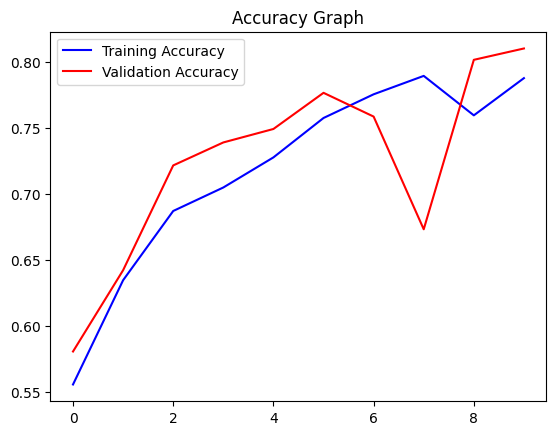

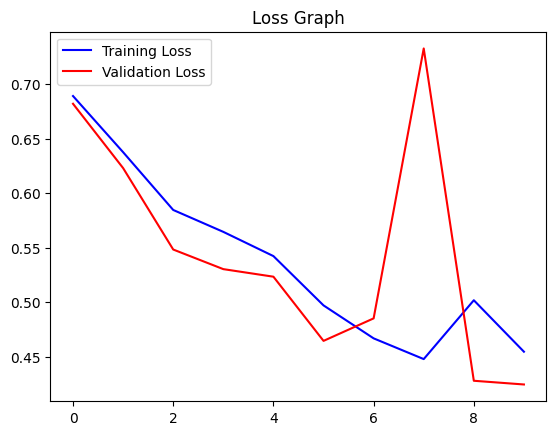

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()